In [1]:
import os
import pandas as pd
import jupyter_black

jupyter_black.load()

current_dir = os.path.dirname(os.path.abspath("__file__"))

### Set file path to datasets

In [2]:
pokemon_path = os.path.join(current_dir, "data", "pokemon.csv")
google_path = os.path.join(current_dir, "data", "google_stock_price.csv")
nba_path = os.path.join(current_dir, "data", "nba.csv")
revenue_path = os.path.join(current_dir, "data", "revenue.csv")
bond_path = os.path.join(current_dir, "data", "jamesbond.csv")
chicago_path = os.path.join(current_dir, "data", "chicago.csv")
salesmen_path = os.path.join(current_dir, "data", "salesmen.csv")
foods_path = os.path.join(current_dir, "data", "foods.csv")

#### Go back and forth between `pd.Series` and `pd.DataFrame` with `to_frame()` and `squeeze()`

In [3]:
fruits = ["Apple", "Orange", "Banana", "Pear"]
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday"]
s = pd.Series(index=weekdays, data=fruits)
display(s)
df = s.to_frame()
display(df)
s = df.squeeze()
display(s)

Monday        Apple
Tuesday      Orange
Wednesday    Banana
Thursday       Pear
dtype: object

,0
Monday,Apple
Tuesday,Orange
Wednesday,Banana
Thursday,Pear


Monday        Apple
Tuesday      Orange
Wednesday    Banana
Thursday       Pear
Name: 0, dtype: object

### The `apply()` Method

In [4]:
pokemon = pd.read_csv(pokemon_path, index_col="Pokemon").squeeze()


def rank_pokemon(pokemon_type):
    if pokemon_type in ["Grass", "Fire", "Water"]:
        return "Classic"
    elif pokemon_type == "Normal":
        return "Boring"
    return "TBD"


pokemon.apply(rank_pokemon).head(3)

Pokemon
Bulbasaur    Classic
Ivysaur      Classic
Venusaur     Classic
Name: Type, dtype: object

### Insert new column at a specific position

In [5]:
nba = pd.read_csv(nba_path)
nba.insert(3, "new_col", "New column at position 3")
nba.head(3)

,Name,Team,Number,new_col,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,New column at position 3,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,New column at position 3,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,New column at position 3,SG,27.0,6-5,205.0,Boston University,NaN


### Apply aggregation function accross the different axis

In [6]:
revenue = pd.read_csv(revenue_path, index_col=["Date"])

# The following give identical result, and sum ACCROSS rows
revenue.sum()
revenue.sum(axis=0)
# The following sum ACCROSS columns
revenue.sum(axis=1).head(3)

Date
1/1/16    1606
1/2/16    2060
1/3/16     967
dtype: int64

Note that `df[]` creates a copy, while `df.loc[]` references the existing DataFrame. <br>
`df.loc[]` must therefore be used when changing the values in a DataFrame

### Use the `nsmallest` / `nlargest` methods

In [7]:
bond = pd.read_csv(bond_path, index_col="Film")
# nlargest/nsmallest are faster than sort_values
bond.nlargest(3, columns="Box Office")
bond.nsmallest(2, columns="Box Office")

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9
A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1


### The `get()` Method 

In [8]:
chicago = pd.read_csv(chicago_path)
chicago["Last Name"] = chicago["Name"].str.split(",").str.get(0).str.strip()
chicago["First Name"] = chicago["Name"].str.split(",").str.get(1).str.strip()
chicago.head(3)

,Name,Position Title,Department,Employee Annual Salary,Last Name,First Name
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$90744.00,AARON,ELVIA J
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$84450.00,AARON,JEFFERY M
2,"AARON, KARINA",POLICE OFFICER,POLICE,$84450.00,AARON,KARINA


Another way to achieve similar to above is to use `.split()` with `expand=True`

In [9]:
chicago = pd.read_csv(chicago_path)
chicago["Name"].str.split(",", expand=True).rename(
    columns={0: "last Name", 1: "First Name"}
).head(3)

,last Name,First Name
0,AARON,ELVIA J
1,AARON,JEFFERY M
2,AARON,KARINA


### The `pivot()` method

Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

In [10]:
sales = pd.read_csv(salesmen_path, parse_dates=["Date"])
sales["Salesman"] = sales["Salesman"].astype("category")
display(sales.head(3))
sales = sales.pivot(index="Date", columns="Salesman", values="Revenue")
sales.head(3)

,Date,Salesman,Revenue
0,2016-01-01,Bob,7172
1,2016-01-02,Bob,6362
2,2016-01-03,Bob,5982


Salesman,Bob,Dave,Jeb,Oscar,Ronald
Date,,,,,
2016-01-01,7172,1864,4430,5250,2639
2016-01-02,6362,8278,8026,8661,4951
2016-01-03,5982,4226,5188,7075,2703


### The `pivot_table()` Method

The `pivot_table()` Method works as the pivot method in Excel

In [11]:
foods = pd.read_csv(foods_path)
display(foods.head())
foods.pivot_table(values="Spend", index="Gender", aggfunc="mean")
foods.pivot_table(values="Spend", index="Gender", columns="City", aggfunc="mean")

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14
3,Anna,Female,Philadelphia,Once,Ice Cream,11.01
4,Deborah,Female,Philadelphia,Daily,Chalupa,23.49


City,New York,Philadelphia,Stamford
Gender,,,
Female,48.666194,52.63765,50.502184
Male,52.318418,46.60142,49.596623


### Things with you can do with `groupby()`


The grouped dataframe is an iteratble. When iterating over it, we we get a tuple for each unique value in the column we grouped by, where the first element in the tuple is the unique value in the column and the secound is the dataframe where the column has this value.



In [25]:
grouped_df = bond.groupby("Actor")
# Printing the number of rows in each group in the grouped dataframe:
grouped_df.size().sort_values(ascending=False)



Actor
Roger Moore       7
Sean Connery      7
Daniel Craig      4
Pierce Brosnan    4
Timothy Dalton    2
David Niven       1
George Lazenby    1
dtype: int64

Iterating over the grouped dataframe

In [42]:
for actor, movies in grouped_df:
    print(f"Actor: {actor}")
    display(df.head(2))

Actor: Daniel Craig


,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9


Actor: David Niven


,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9


Actor: George Lazenby


,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9


Actor: Pierce Brosnan


,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9


Actor: Roger Moore


,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9


Actor: Sean Connery


,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9


Actor: Timothy Dalton


,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2
Licence to Kill,1989,Timothy Dalton,John Glen,250.9,56.7,7.9


Getting a specific group

In [30]:
grouped_df.get_group("Daniel Craig")

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Casino Royale,2006,Daniel Craig,Martin Campbell,581.5,145.3,3.3
Quantum of Solace,2008,Daniel Craig,Marc Forster,514.2,181.4,8.1
Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN


Aggregating over a column for each group

In [41]:
grouped_df[["Bond Actor Salary", "Box Office"]].agg(["sum", "mean"])

Bond Actor Salary            Box Office            
                             sum       mean        sum        mean
Actor                                                             
Daniel Craig                25.9   8.633333     2765.9  691.475000
David Niven                  0.0        NaN      315.0  315.000000
George Lazenby               0.6   0.600000      291.5  291.500000
Pierce Brosnan              46.5  11.625000     1886.6  471.650000
Roger Moore                 16.9   8.450000     2960.7  422.957143
Sean Connery                20.3   3.383333     3997.8  571.114286
Timothy Dalton              13.1   6.550000      564.4  282.200000

### Import stock data with `pandas_datareader`

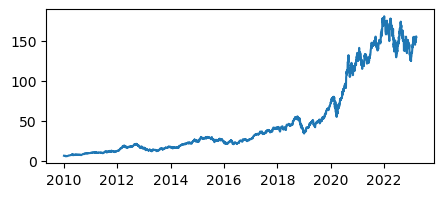

In [69]:
from pandas_datareader import data
import datetime as dt
import matplotlib.pyplot as plt

stocks = data.DataReader(
    name="AAPL", data_source="stooq", start="2010-01-01", end=dt.datetime.today()
)


fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(stocks.index, stocks.Close)
plt.show()

### Options

In [ ]:
pd.options.display.max_rows = 5
pd.options.display.max_columns = 4
pd.options.display.precision = 2